## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

import tabulate

## Importing Dataset

In [2]:
df = pd.read_csv(r'D:\Fraudulent-transaction-predictor\data\Raw_data\NewData.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Fraudulent-transaction-predictor\\data\\Raw_data\\NewData.csv'

In [ ]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,TARGET
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,0,C,Yes
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,-1,C,Yes
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,-2,C,Yes
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,-3,C,Yes
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,-4,C,Yes


In [ ]:
df.shape

(777715, 21)

In [ ]:
print(df.dtypes.to_markdown())

|                     | 0       |
|:--------------------|:--------|
| ID                  | int64   |
| CODE_GENDER         | object  |
| FLAG_OWN_CAR        | object  |
| FLAG_OWN_REALTY     | object  |
| CNT_CHILDREN        | int64   |
| AMT_INCOME_TOTAL    | float64 |
| NAME_INCOME_TYPE    | object  |
| NAME_EDUCATION_TYPE | object  |
| NAME_FAMILY_STATUS  | object  |
| NAME_HOUSING_TYPE   | object  |
| DAYS_BIRTH          | int64   |
| DAYS_EMPLOYED       | int64   |
| FLAG_MOBIL          | int64   |
| FLAG_WORK_PHONE     | int64   |
| FLAG_PHONE          | int64   |
| FLAG_EMAIL          | int64   |
| OCCUPATION_TYPE     | object  |
| CNT_FAM_MEMBERS     | float64 |
| MONTHS_BALANCE      | int64   |
| STATUS              | object  |
| TARGET              | object  |


In [ ]:
df.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        240048
CNT_FAM_MEMBERS             0
MONTHS_BALANCE              0
STATUS                      0
TARGET                      0
dtype: int64

## Data cleaning

### `ID` column

The ID column seems to be of no use. Hence Dropping it.

##### Step :-  Dropping

In [ ]:
df1 = df.drop(['ID'], axis = 'columns')

In [ ]:
df1.columns

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'MONTHS_BALANCE',
       'STATUS', 'TARGET'],
      dtype='object')

### `CODE_GENDER` column

In [ ]:
df1['CODE_GENDER'].nunique()

2

In [ ]:
df1['CODE_GENDER'].unique()

array(['M', 'F'], dtype=object)

Since the `CODE_GENDER` column doesn't contain any null values and its unique values seem appropriate, it appears to be clean and doesn't require further cleaning.

### `FLAG_OWN_CAR` column

In [ ]:
df1['FLAG_OWN_CAR'].nunique()

2

In [ ]:
df1['FLAG_OWN_CAR'].unique()

array(['Y', 'N'], dtype=object)

Since the `FLAG_OWN_CAR` column doesn't contain any null values and its unique values seem appropriate, it appears to be clean and doesn't require further cleaning.

### `FLAG_OWN_REALTY` column

In [ ]:
df1['FLAG_OWN_REALTY'].unique()

array(['Y', 'N'], dtype=object)

Since the `FLAG_OWN_REALTY` column doesn't contain any null values and its unique values seem appropriate, it appears to be clean and doesn't require further cleaning.

### `CNT_CHILDREN` column

In [ ]:
df1['CNT_CHILDREN'].nunique()

9

In [ ]:
df1['CNT_CHILDREN'].unique()

array([ 0,  1,  3,  2,  4,  5, 14, 19,  7], dtype=int64)

In [ ]:
df1['CNT_CHILDREN'].value_counts()

CNT_CHILDREN
0     540639
1     155638
2      70399
3       9328
4       1224
5        324
14       111
7         46
19         6
Name: count, dtype: int64

Having 5 to 7 children in a family seems reasonable, but when a single family has 14 or 19 children, it appears to be outliers. Therefore, we will remove some of these extreme values from the dataset.

##### Removing Outliers

In [ ]:
df2 = df1[df1['CNT_CHILDREN'] != 14]

In [ ]:
df3 = df2[df2['CNT_CHILDREN'] != 19]

In [ ]:
df3.shape

(777598, 20)

In [ ]:
df3['CNT_CHILDREN'].value_counts()

CNT_CHILDREN
0    540639
1    155638
2     70399
3      9328
4      1224
5       324
7        46
Name: count, dtype: int64

Since the `CNT_CHILDREN` column doesn't contain any null values and its unique values seem appropriate, it appears to be clean and doesn't require further cleaning.

### `AMT_INCOME_TOTAL` column

In [ ]:
df3['AMT_INCOME_TOTAL'].nunique()

265

In [ ]:
with open(r'D:\Fraudulent-transaction-predictor\notebooks\unique_values\AMT_INCOME_TOTAL_UNIQUE_VALUES.txt', 'w') as f:
    for i in df3['AMT_INCOME_TOTAL'].unique():
        f.write(str(i) + "\n")

In [ ]:
min(df3['AMT_INCOME_TOTAL'])

27000.0

In [ ]:
max(df3['AMT_INCOME_TOTAL'])

1575000.0

In [ ]:
df3['AMT_INCOME_TOTAL'].mean()

188530.18345597596

In [ ]:
X = np.arange(1, df3.shape[0] + 1)
X

array([     1,      2,      3, ..., 777596, 777597, 777598])

In [ ]:
Y = df3['AMT_INCOME_TOTAL'].values
Y

array([427500., 427500., 427500., ..., 112500., 112500., 112500.])

In [ ]:
len(X), len(Y)

(777598, 777598)

In [ ]:
def calculating_outlier_values(threshold:int, X:list, Y:list):
    X_above_values = []
    Y_above_values = []

    X_below_values = []
    Y_below_values = []

    for i in range(len(Y)):
        if Y[i] > threshold:
            X_above_values.append(i)
            Y_above_values.append(Y[i])

        else:
            X_below_values.append(i)
            Y_below_values.append(Y[i])

    return X_above_values, Y_above_values, X_below_values, Y_below_values

In [ ]:
threshold = 1000000

X_above_values, Y_above_values, X_below_values, Y_below_values = calculating_outlier_values(threshold, X, Y)

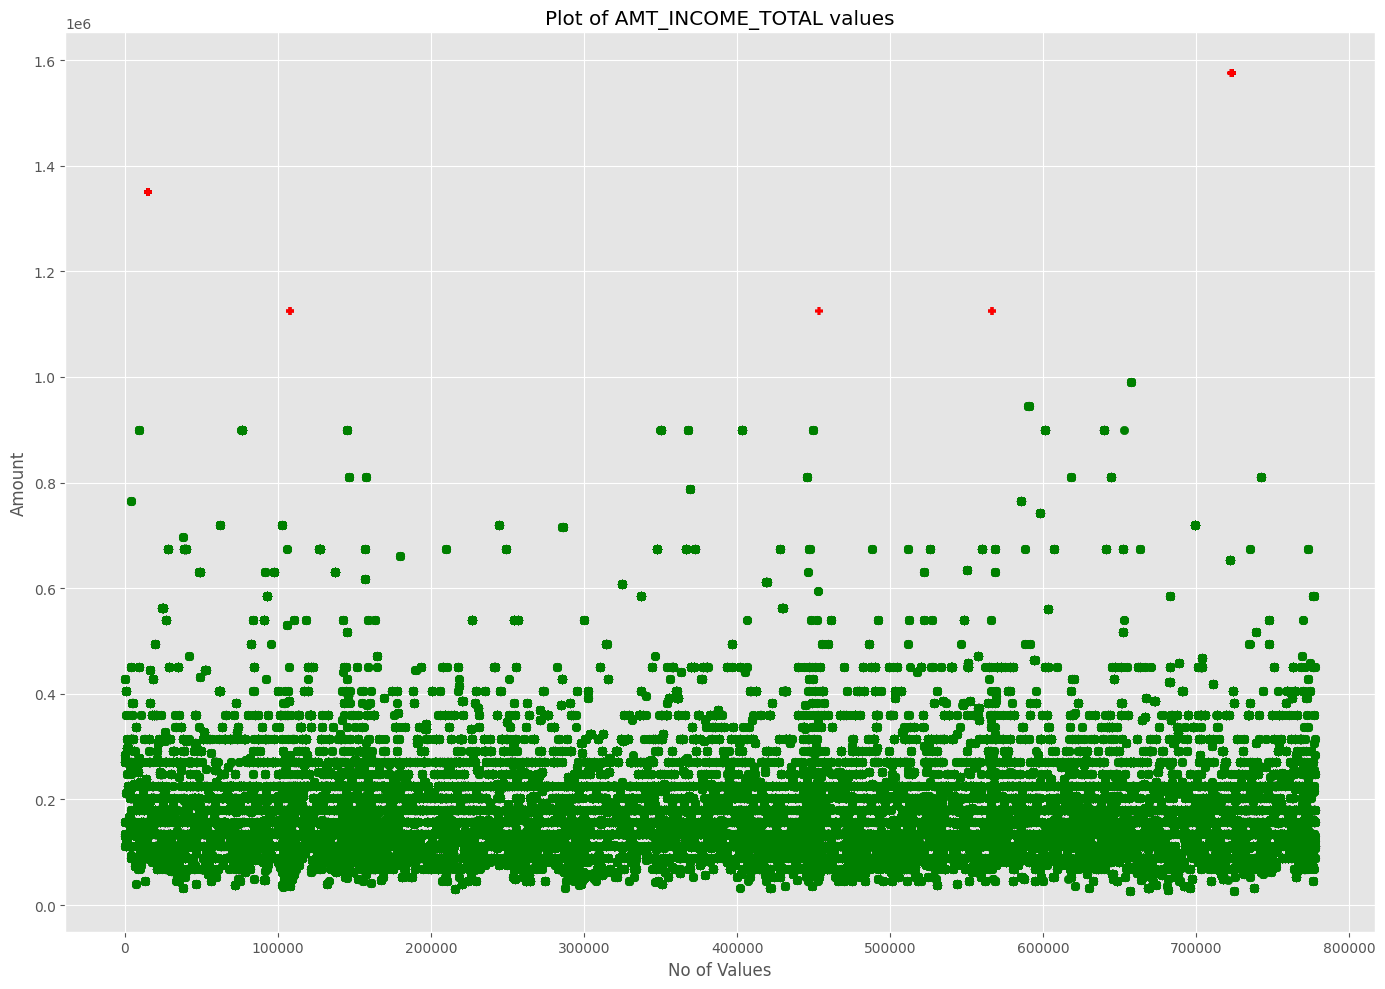

In [ ]:
plt.figure(figsize = (14, 10))

plt.style.use('ggplot')

plt.scatter(x = X_above_values,
            y = Y_above_values,
            color = 'red',
            marker = "+")

plt.scatter(x = X_below_values,
            y = Y_below_values,
            color = 'green')

plt.xlabel("No of Values")
plt.ylabel("Amount")

plt.title("Plot of AMT_INCOME_TOTAL values")

plt.tight_layout()

plt.show()

In [ ]:
len(Y_above_values)

335

##### Removing Outliers

In [ ]:
df4 = df3[df3['AMT_INCOME_TOTAL'] <= threshold]

In [ ]:
X = np.arange(1, df4.shape[0])
X

array([     1,      2,      3, ..., 777260, 777261, 777262])

In [ ]:
Y = df4['AMT_INCOME_TOTAL'].to_list()
Y

[427500.0,
 427500.0,
 427500.0,
 427500.0,
 427500.0,
 427500.0,
 427500.0,
 427500.0,
 427500.0,
 427500.0,
 427500.0,
 427500.0,
 427500.0,
 427500.0,
 427500.0,
 427500.0,
 427500.0,
 427500.0,
 427500.0,
 427500.0,
 427500.0,
 427500.0,
 427500.0,
 427500.0,
 427500.0,
 427500.0,
 427500.0,
 427500.0,
 427500.0,
 427500.0,
 427500.0,
 112500.0,
 112500.0,
 112500.0,
 112500.0,
 112500.0,
 112500.0,
 112500.0,
 112500.0,
 112500.0,
 112500.0,
 112500.0,
 112500.0,
 112500.0,
 112500.0,
 112500.0,
 112500.0,
 112500.0,
 112500.0,
 112500.0,
 112500.0,
 112500.0,
 112500.0,
 112500.0,
 112500.0,
 112500.0,
 112500.0,
 112500.0,
 112500.0,
 112500.0,
 112500.0,
 270000.0,
 270000.0,
 270000.0,
 270000.0,
 270000.0,
 270000.0,
 270000.0,
 270000.0,
 270000.0,
 270000.0,
 270000.0,
 270000.0,
 270000.0,
 270000.0,
 270000.0,
 270000.0,
 270000.0,
 270000.0,
 270000.0,
 270000.0,
 270000.0,
 270000.0,
 270000.0,
 270000.0,
 270000.0,
 270000.0,
 270000.0,
 270000.0,
 270000.0,
 270000.0,

In [ ]:
threshold = 1000000

X_above_values, Y_above_values, X_below_values, Y_below_values = calculating_outlier_values(threshold, X, Y)

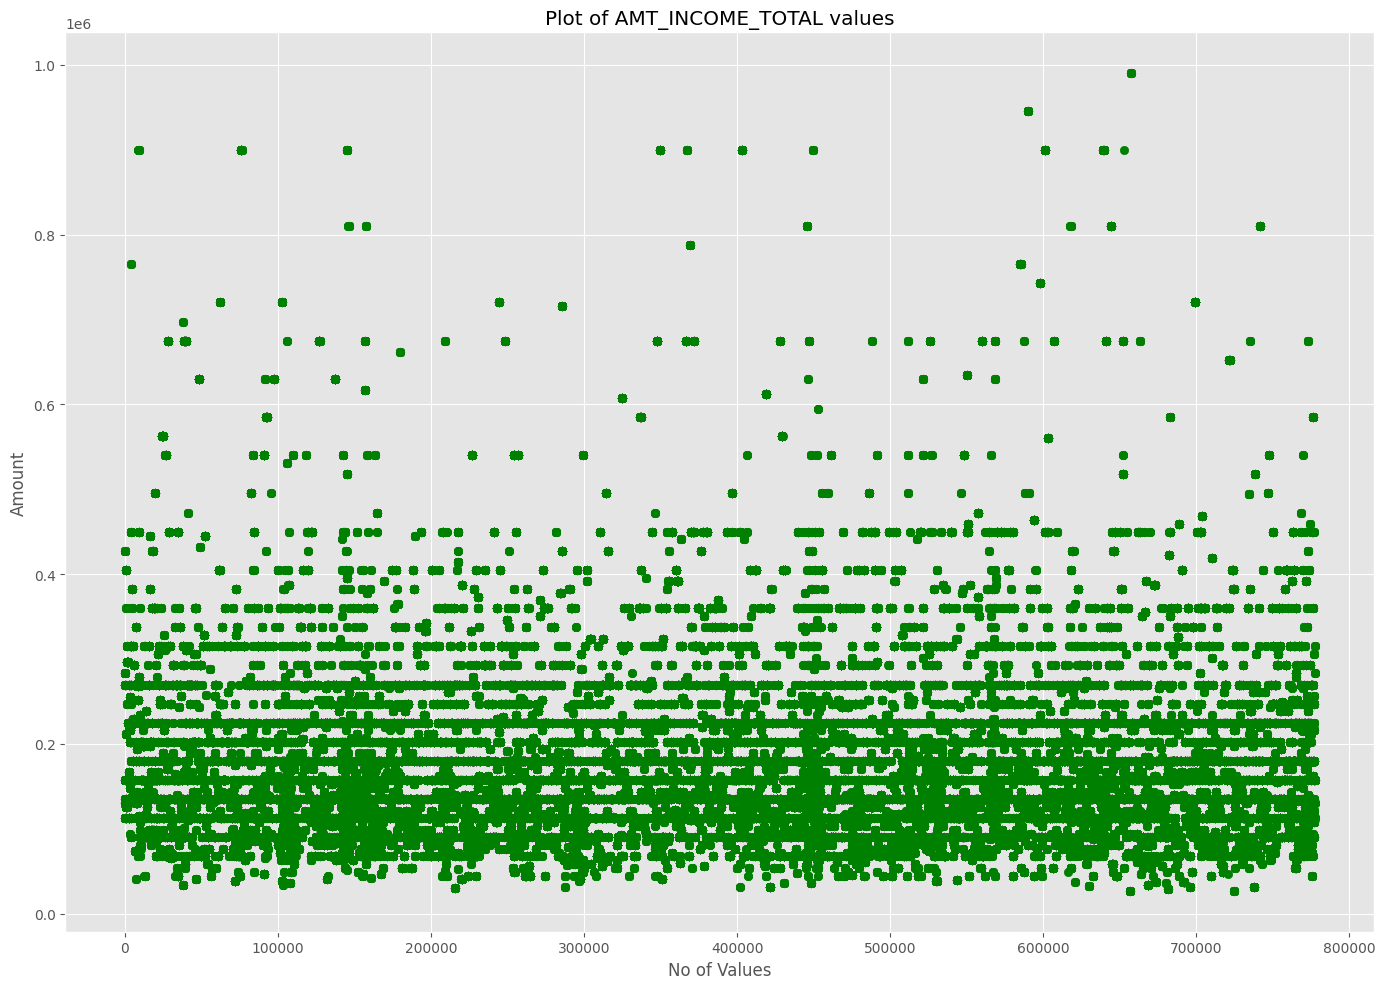

In [ ]:
plt.figure(figsize = (14, 10))

plt.style.use('ggplot')

plt.scatter(x = X_above_values,
            y = Y_above_values,
            color = 'red',
            marker = "+")

plt.scatter(x = X_below_values,
            y = Y_below_values,
            color = 'green')

plt.xlabel("No of Values")
plt.ylabel("Amount")

plt.title("Plot of AMT_INCOME_TOTAL values")

plt.tight_layout()

plt.show()

### `NAME_INCOME_TYPE` column

In [ ]:
df4['NAME_INCOME_TYPE'].nunique()

5

In [ ]:
df4['NAME_INCOME_TYPE'].unique()

array(['Working', 'Commercial associate', 'Pensioner', 'State servant',
       'Student'], dtype=object)

In [ ]:
df4['NAME_INCOME_TYPE'].value_counts()

NAME_INCOME_TYPE
Working                 400017
Commercial associate    183080
Pensioner               128392
State servant            65437
Student                    337
Name: count, dtype: int64

Since the `NAME_INCOME_TYPE` column doesn't contain any null values and its unique values seem appropriate, it appears to be clean and doesn't require further cleaning.

### `NAME_EDUCATION_TYPE` column

In [ ]:
df4['NAME_EDUCATION_TYPE'].nunique()

5

In [ ]:
df4['NAME_EDUCATION_TYPE'].unique()

array(['Higher education', 'Secondary / secondary special',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [ ]:
df4['NAME_EDUCATION_TYPE'].value_counts()

NAME_EDUCATION_TYPE
Secondary / secondary special    524110
Higher education                 213332
Incomplete higher                 30329
Lower secondary                    8655
Academic degree                     837
Name: count, dtype: int64

### `NAME_FAMILY_STATUS` column

In [ ]:
df4['NAME_FAMILY_STATUS'].nunique()

5

In [ ]:
df4['NAME_FAMILY_STATUS'].unique()

array(['Civil marriage', 'Married', 'Single / not married', 'Separated',
       'Widow'], dtype=object)

In [ ]:
df4['NAME_FAMILY_STATUS'].value_counts()

NAME_FAMILY_STATUS
Married                 546434
Single / not married     94179
Civil marriage           60342
Separated                45144
Widow                    31164
Name: count, dtype: int64

### `NAME_HOUSING_TYPE` column

In [ ]:
df4['NAME_HOUSING_TYPE'].nunique()

6

In [ ]:
df4['NAME_HOUSING_TYPE'].unique()

array(['Rented apartment', 'House / apartment', 'Municipal apartment',
       'With parents', 'Co-op apartment', 'Office apartment'],
      dtype=object)

In [ ]:
df4['NAME_HOUSING_TYPE'].value_counts()

NAME_HOUSING_TYPE
House / apartment      696835
With parents            35735
Municipal apartment     24538
Rented apartment        10864
Office apartment         5636
Co-op apartment          3655
Name: count, dtype: int64

### `DAYS_BIRTH` column

In [ ]:
df4['DAYS_BIRTH'].nunique()

7180

In [ ]:
df4['DAYS_BIRTH'].unique()

array([-12005, -21474, -19110, ..., -21590, -15837,  -9188], dtype=int64)

The negative days count appears to be impractical for determining a person's age. Therefore, I will convert them to years for convenience.

In [ ]:
def calculate_yrs(days:int):
    years = (days / 365.25)

    years = abs(int(years))

    return years


In [ ]:
days = df4['DAYS_BIRTH'].to_list()

age = []

for day in days:
    age.append(calculate_yrs(days = day))



In [ ]:
df4['AGE'] = age

C:\Users\sunil\AppData\Local\Temp\ipykernel_27708\4094080994.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['AGE'] = age


In [ ]:
df4['AGE'].value_counts()

AGE
40    26629
37    25563
39    24327
38    23488
32    23336
41    23029
42    22859
33    22371
43    22128
27    21614
34    21588
28    21587
35    20962
51    20898
44    20827
36    20651
46    20448
31    20408
30    20256
29    19689
54    19581
50    19182
48    19051
45    17989
47    17925
53    17605
59    17511
57    17381
60    16911
52    16433
49    16381
56    16291
58    15827
55    14410
62    13668
63    12497
61    11792
26    10180
64    10151
25     7414
65     7267
24     6144
66     5091
67     3121
23     2186
22     1719
68      807
21       89
20        1
Name: count, dtype: int64

In [ ]:
X_AGE = np.arange(1, df4.shape[0])
Y_AGE = age

In [ ]:
threshold = 20

X_above_values, Y_above_values, X_below_values, Y_below_values = calculating_outlier_values(threshold, X_AGE, Y_AGE)

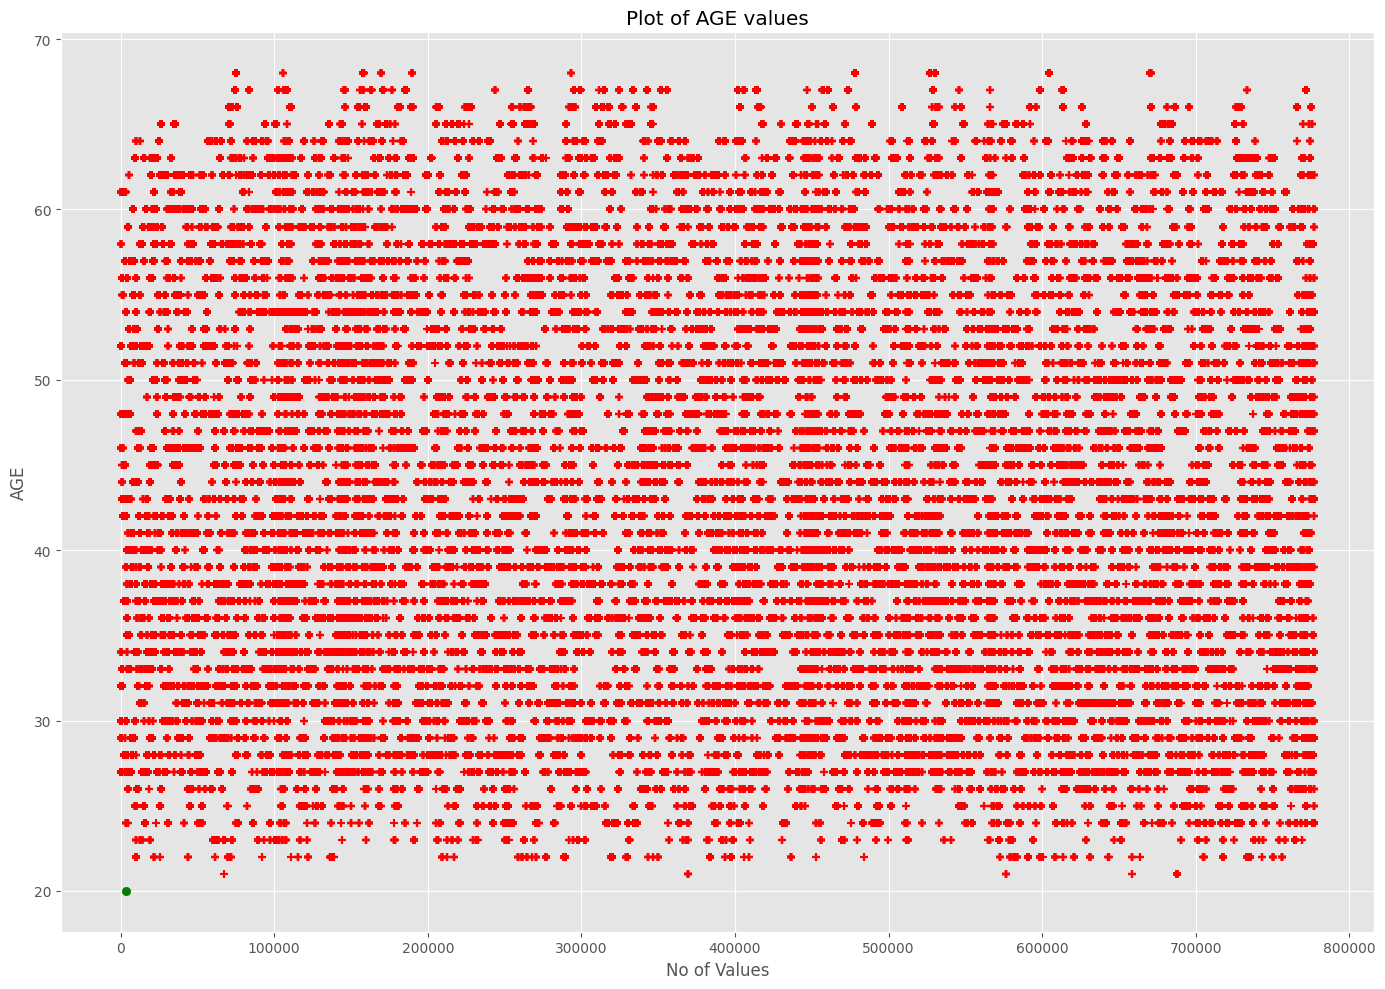

In [ ]:
plt.figure(figsize = (14, 10))

plt.style.use('ggplot')

plt.scatter(x = X_above_values,
            y = Y_above_values,
            color = 'red',
            marker = "+")

plt.scatter(x = X_below_values,
            y = Y_below_values,
            color = 'green')

plt.xlabel("No of Values")
plt.ylabel("AGE")

plt.title("Plot of AGE values")

plt.tight_layout()

plt.show()

In [ ]:
df5 = df4.drop(['DAYS_BIRTH'], axis = 'columns')

### `DAYS_EMPLOYED` column

In [ ]:
df5['DAYS_EMPLOYED'].nunique()

3638

In [ ]:
df5['DAYS_EMPLOYED'].unique()

array([ -4542,  -1134,  -3051, ...,  -8161,   -606, -11272], dtype=int64)

The negative days count appears to be impractical for determining a person's employment years. Therefore, I will convert them to years for convenience.

In [ ]:
emp_days = df5['DAYS_EMPLOYED'].to_list()

In [ ]:
yrs = []

for day in emp_days:
    yrs.append(calculate_yrs(days=day))

In [ ]:
df5['YR_EMPLOYEED'] = yrs

In [ ]:
threshold = 50

X_above_values, Y_above_values, X_below_values, Y_below_values = calculating_outlier_values(threshold, X, yrs)

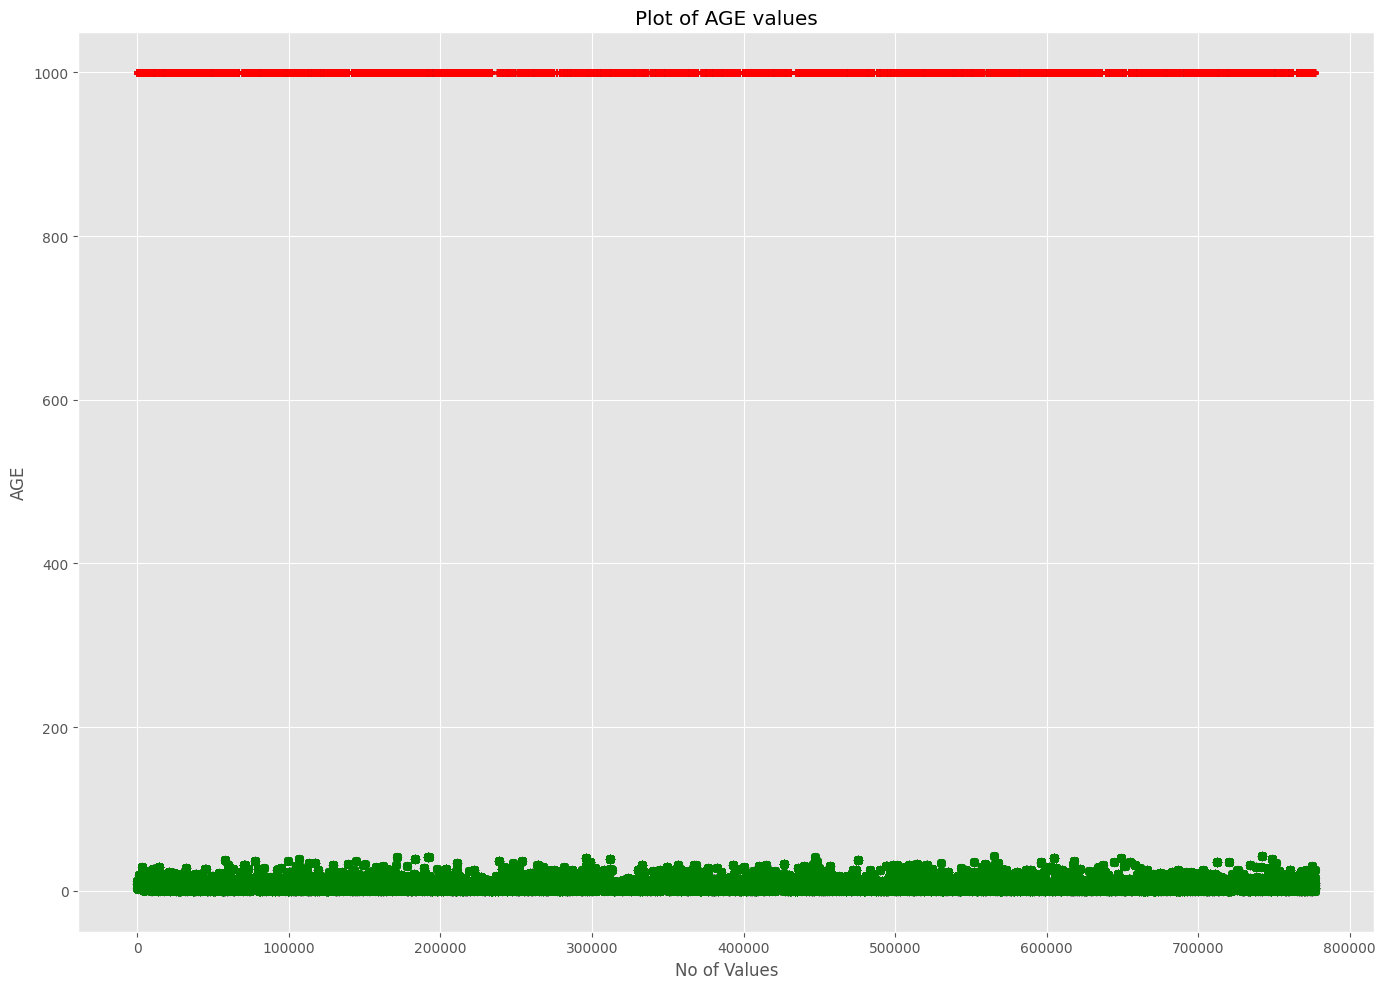

In [ ]:
plt.figure(figsize = (14, 10))

plt.style.use('ggplot')

plt.scatter(x = X_above_values,
            y = Y_above_values,
            color = 'red',
            marker = "+")

plt.scatter(x = X_below_values,
            y = Y_below_values,
            color = 'green')

plt.xlabel("No of Values")
plt.ylabel("AGE")

plt.title("Plot of AGE values")

plt.tight_layout()

plt.show()

These are something different outliers.

In [ ]:
df6 = df5[df5['YR_EMPLOYEED'] <= threshold]

In [ ]:
df6.shape

(649291, 21)

In [ ]:
X_AGE = np.arange(1, df6.shape[0])
Y_AGE = df6['YR_EMPLOYEED'].to_list()

In [ ]:
threshold = 50

X_above_values, Y_above_values, X_below_values, Y_below_values = calculating_outlier_values(threshold, X, Y_AGE)

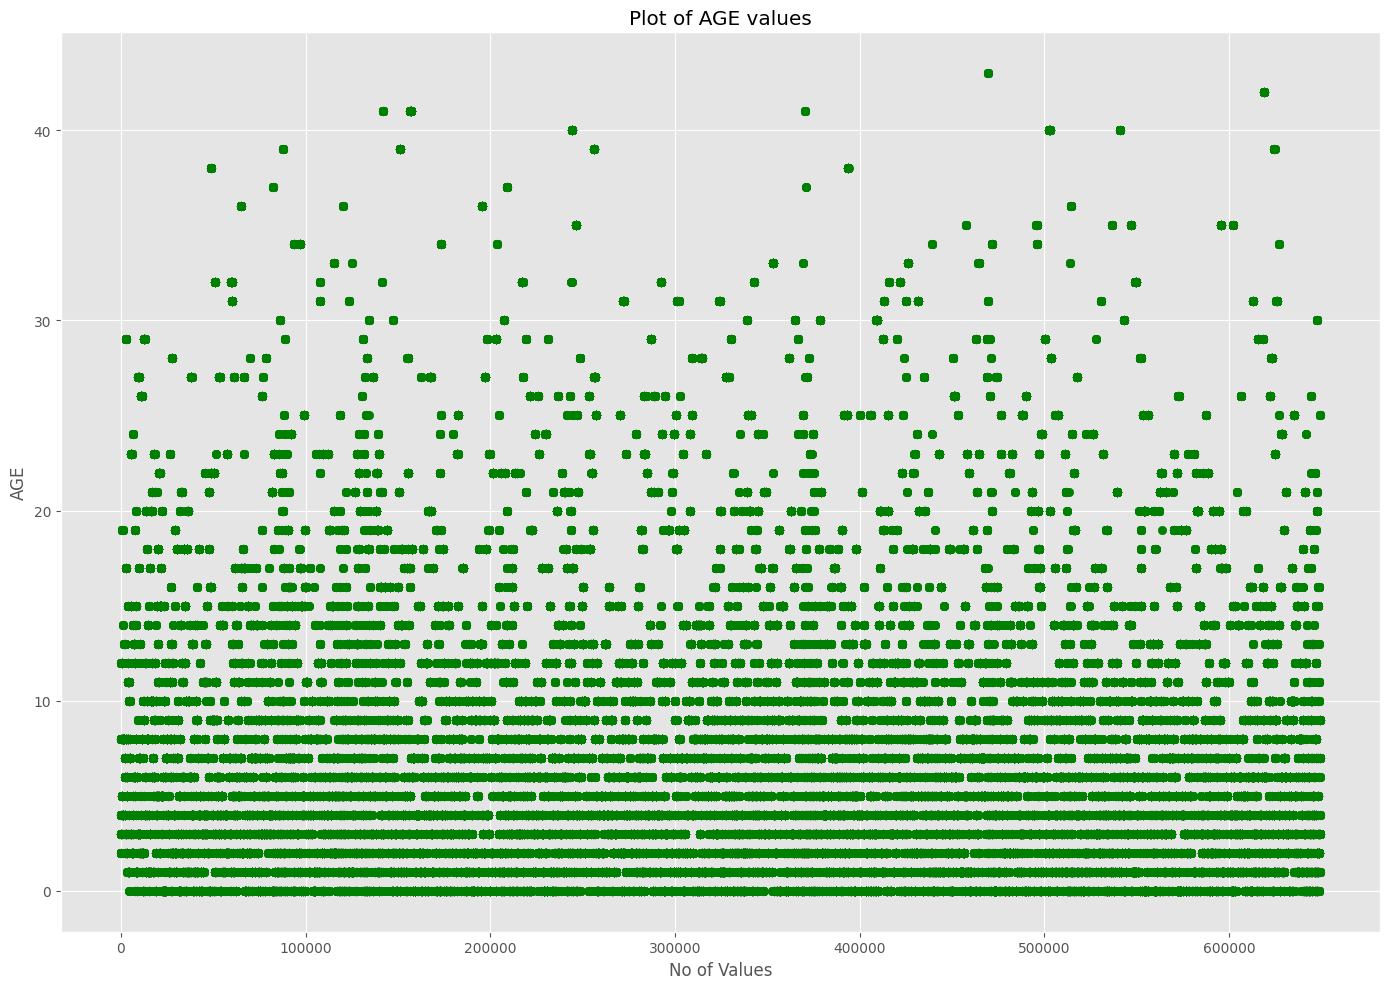

In [ ]:
plt.figure(figsize = (14, 10))

plt.style.use('ggplot')

plt.scatter(x = X_above_values,
            y = Y_above_values,
            color = 'red',
            marker = "+")

plt.scatter(x = X_below_values,
            y = Y_below_values,
            color = 'green')

plt.xlabel("No of Values")
plt.ylabel("AGE")

plt.title("Plot of AGE values")

plt.tight_layout()

plt.show()

In [ ]:
df7 = df6.drop(['DAYS_EMPLOYED'], axis = 'columns')

### `FLAG_MOBIL` column

In [ ]:
df7['FLAG_MOBIL'].nunique()

1

In [ ]:
df7['FLAG_MOBIL'].unique()

array([1], dtype=int64)

In [ ]:
df8 = df7.drop(['FLAG_MOBIL'], axis = 'columns')

### `FLAG_WORK_PHONE` column

In [ ]:
df8['FLAG_WORK_PHONE'].nunique()

2

In [ ]:
df8['FLAG_WORK_PHONE'].unique()

array([1, 0], dtype=int64)

In [ ]:
df9 = df8.drop(['FLAG_WORK_PHONE'], axis = 'columns')

### `FLAG_PHONE` column

In [ ]:
df9['FLAG_PHONE'].nunique()

2

In [ ]:
df9['FLAG_PHONE'].unique()

array([0, 1], dtype=int64)

In [ ]:
df10 = df9.drop(['FLAG_PHONE'], axis = 'columns')

### `FLAG_EMAIL` column

In [ ]:
df10['FLAG_EMAIL'].nunique()

2

In [ ]:
df10['FLAG_EMAIL'].unique()

array([0, 1], dtype=int64)

In [ ]:
df11 = df10.drop(['FLAG_EMAIL'], axis = 'columns')

In [ ]:
df11.shape

(649291, 16)

### `OCCUPATION_TYPE` column

In [ ]:
df11['OCCUPATION_TYPE'].nunique()

18

In [ ]:
df11['OCCUPATION_TYPE'].unique()

array([nan, 'Security staff', 'Sales staff', 'Accountants', 'Laborers',
       'Managers', 'Drivers', 'Core staff', 'High skill tech staff',
       'Cleaning staff', 'Private service staff', 'Cooking staff',
       'Low-skill Laborers', 'Medicine staff', 'Secretaries',
       'Waiters/barmen staff', 'HR staff', 'Realty agents', 'IT staff'],
      dtype=object)

In [ ]:
df11['OCCUPATION_TYPE'].value_counts()

OCCUPATION_TYPE
Laborers                 131572
Core staff                77112
Sales staff               70362
Managers                  67403
Drivers                   47567
High skill tech staff     31768
Accountants               27223
Medicine staff            26691
Cooking staff             13416
Security staff            12400
Cleaning staff            11399
Private service staff      6714
Low-skill Laborers         3623
Secretaries                3149
Waiters/barmen staff       2551
HR staff                   1686
IT staff                   1319
Realty agents              1260
Name: count, dtype: int64

In [ ]:
occu_list = df11['OCCUPATION_TYPE'].to_list()

In [ ]:
new_occu_list = []

for i in occu_list:
    if i in ['Managers', 'Secretaries', 'HR staff']:
        new_occu_list.append('Administrative and Management')

    elif i in ['Sales staff', 'Waiters/barmen staff', 'Realty agents']:
        new_occu_list.append('Customer Service and Hospitality')

    elif i in ['Accountants']:
        new_occu_list.append('Finance and Accounting')

    elif i in ['High skill tech staff', 'IT staff']:
        new_occu_list.append('Technical and IT')

    elif i in ['Medicine staff']:
        new_occu_list.append('Healthcare')

    elif i in ['Security staff', 'Core staff', 'Cleaning staff', 'Private service staff', 'Cooking staff']:
        new_occu_list.append('Support and Services')

    elif i in ['Drivers']:
        new_occu_list.append('Transportation and Logistics')

    elif i in ['Laborers', 'Low-skill Laborers']:
        new_occu_list.append('Labor and Maintenance')

    else:
        new_occu_list.append(i)

In [ ]:
df11['NEW_OCC_COL'] = new_occu_list

In [ ]:
df11['NEW_OCC_COL'].value_counts()

NEW_OCC_COL
Labor and Maintenance               135195
Support and Services                121041
Customer Service and Hospitality     74173
Administrative and Management        72238
Transportation and Logistics         47567
Technical and IT                     33087
Finance and Accounting               27223
Healthcare                           26691
Name: count, dtype: int64

In [ ]:
(df11['NEW_OCC_COL'].isnull().sum() / df11.shape[0]) * 100

17.261289622064684

In [ ]:
df11.dropna(inplace=True)

In [ ]:
df12 = df11.drop(['OCCUPATION_TYPE'], axis = 'columns')

In [ ]:
df12.isnull().sum()

CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
CNT_FAM_MEMBERS        0
MONTHS_BALANCE         0
STATUS                 0
TARGET                 0
AGE                    0
YR_EMPLOYEED           0
NEW_OCC_COL            0
dtype: int64

### `CNT_FAM_MEMBERS` column

In [ ]:
df12['CNT_FAM_MEMBERS'].nunique()

8

In [ ]:
df12['CNT_FAM_MEMBERS'].unique()

array([2., 1., 5., 3., 4., 6., 7., 9.])

In [ ]:
df12['CNT_FAM_MEMBERS'].isnull().sum()

0

### `MONTHS_BALANCE` column

In [ ]:
df12['MONTHS_BALANCE'].nunique()

61

In [ ]:
df12['MONTHS_BALANCE'].unique()

array([  0,  -1,  -2,  -3,  -4,  -5,  -6,  -7,  -8,  -9, -10, -11, -12,
       -13, -14, -15, -16, -17, -18, -19, -20, -21, -22, -23, -24, -25,
       -26, -27, -28, -29, -30, -31, -32, -33, -34, -35, -36, -37, -38,
       -39, -40, -41, -42, -43, -44, -45, -46, -47, -48, -49, -50, -51,
       -52, -53, -54, -55, -56, -57, -58, -59, -60], dtype=int64)

In [ ]:
df13 = df12.drop(['MONTHS_BALANCE'], axis = 'columns')

### `STATUS` column

In [ ]:
df13['STATUS'].unique()

array(['C', 'X', '0', '1', '5', '4', '3', '2'], dtype=object)

### `TARGET` column

In [ ]:
df13['TARGET'].nunique()

2

In [ ]:
df13['TARGET'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df13['TARGET'].value_counts()

TARGET
Yes    535253
No       1962
Name: count, dtype: int64